# Foundations of AI & ML
## Session 08
### Experiment 3 Part 3

### K-fold cross-validation

In this form of cross-validation the data set is divided into k subsets. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. 

In this experiment we are going to apply k-fold cross-validation method on the MNIST datasets and then tune the hyper parameters of MLPClassifier.

In [1]:
## Importing required packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

### Generating the dataset

In [19]:
## Loading MNIST dataset from sklearn
digits = datasets.load_digits(n_class=10)
## Loding the data and storing in x
X = digits.data
## Loading the target data and storing it in y
y = digits.target
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [20]:
### hyper parameters
# activation
a = ["identity","logistic","tanh","relu"]
#solvers
s = ["lbfgs","sgd","adam"]
#learning rate
lr = [0.0001,0.001,0.01,0.1]
#hidden layers
h = [(5,2),(3,2),(6,3),(7,2)]

In [21]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=4)

In [22]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 5000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf  
#function to calculate the accuracy
def accuracy(actual,predicted):
    return np.count_nonzero(actual == predicted)*1.0/len(actual)

** Exercise 1** Predict the values using test data and calculate the accuracy

In [26]:
test_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0#In this experiment we are going to apply leave one out method on the MNIST datasets then we tune the hyper parameters of MulitiLayer perceptron classifier.
    for train_index, test_index in kf.split(X):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest =  tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    train_accuracy.append(tempTrain*1.0/4)
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/4)
    print("(train,test) accuracy = ",tempTrain*1.0/4, tempTest*1.0/4)


Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (3, 2)
(train,test) accuracy =  0.36856549007686057 0.3561804008908686

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.6848684514879753 0.5820217767879238

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.4269468199471735 0.3902548874041079

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.8842311411885737 0.7390435535758476

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.643255619147066 0.5365392229646128

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init = 

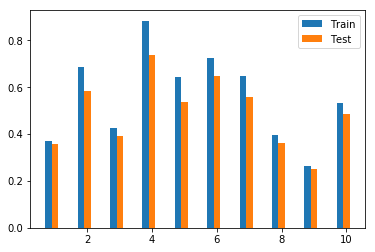

In [27]:
##Plotting the data
xx = np.array(range(1,11))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()

**Exercise 2 ** Vary the number of k-fold splits and observe the changes

In [28]:
## Importing required packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

In [29]:
## Loading MNIST dataset from sklearn
digits = datasets.load_digits(n_class=9)
## Loding the data and storing in x
X = digits.data
## Loading the target data and storing it in y
y = digits.target

In [30]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0])

In [31]:
### hyper parameters
# activation
a = ["identity","logistic","tanh","relu"]
#solvers
s = ["lbfgs","sgd","adam"]
#learning rate
lr = [0.0001,0.001,0.01,0.1]
#hidden layers
h = [(5,2),(3,2),(6,3),(7,2)]

In [32]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=5)

In [33]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 5000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf  
#function to calculate the accuracy
def accuracy(actual,predicted):
    return np.count_nonzero(actual == predicted)*1.0/len(actual)

In [37]:
test_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0#In this experiment we are going to apply leave one out method on the MNIST datasets then we tune the hyper parameters of MulitiLayer perceptron classifier.
    for train_index, test_index in kf.split(X):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest =  tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    train_accuracy.append(tempTrain*1.0/4)
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/4)
    print("(train,test) accuracy = ",tempTrain*1.0/4, tempTest*1.0/4)


Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.6620251000811648 0.5792865879295188

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)
(train,test) accuracy =  0.24274329375510267 0.2272531819745442

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (7, 2)
(train,test) accuracy =  0.9034766624709678 0.8116662844475022

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.5480990256654845 0.5101407522073156

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.7104389525814305 0.6586735083897106

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.001

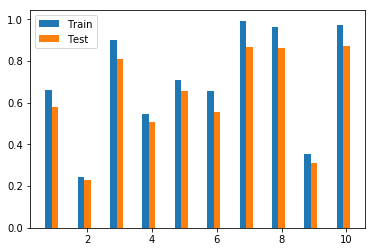

In [38]:
##Plotting the data
xx = np.array(range(1,11))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()